## Task 3: Transfer Learning

In [12]:
import numpy as np
from tensorflow.keras.applications import ResNet50V2
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Dropout, Input, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

from funcs_Task1 import training_data_Pipeline, test_validation_data_Pipeline

In [2]:
# constants
img_height = img_width = 128
batch_size = 128
img_size = (img_height, img_width)

train_dir = 'covid xray/train'
val_dir = 'covid xray/val'
test_dir = 'covid xray/test'

epochs=30


### 1. Classification Set-Up

In [3]:
np.random.seed(123)
metrics = ["accuracy"]

### 2. Setting Up the Base Model

In [4]:
# instantiate pre-trained model and freeze layers
ResNet_model = ResNet50V2(
    include_top=False,
    weights="imagenet",
)

ResNet_model.trainable = False

In [8]:
# add extra layers to model
inputs = Input(shape=(img_height, img_width, 3))
x = ResNet_model(inputs, training = False)
x = Dropout(0.1)(x)
x = Flatten()(x)
outputs = Dense(1, activation = 'sigmoid')(x)
model = keras.Model(
    inputs,
    outputs
)

# print architecture
model.summary(show_trainable = True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 128, 128, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ resnet50v2 (Functional)     │ (None, 4, 4, 2048)    │ 23,564,800 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_1 (Dropout)         │ (None, 4, 4, 2048)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 32768)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 1)             │     32,769 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 23,597,569 (90.02 MB)

 Trainable params: 32,769 (128.00 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

### 3. Model Training

In [9]:
# compile model and fetch training and validation data
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics= metrics)

train_data_gen = training_data_Pipeline(batch_size, img_size, train_dir)
val_data_gen = test_validation_data_Pipeline(batch_size, img_size, test_dir = val_dir, train_dir = train_dir)

total_train=train_data_gen.samples
total_val = val_data_gen.samples

Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [10]:
# train model
history = model.fit(
    train_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Artificial Intelligence\exercises\project\ai_course_2025\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6382 - loss: 4.3024 - val_accuracy: 0.5443 - val_loss: 4.5188
Epoch 2/30
 1/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7031 - loss: 2.3951

c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Artificial Intelligence\exercises\project\ai_course_2025\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 598ms/step - accuracy: 0.7031 - loss: 2.3951 - val_accuracy: 0.5703 - val_loss: 3.4279
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7691 - loss: 1.2186 - val_accuracy: 0.7083 - val_loss: 1.3983
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 568ms/step - accuracy: 0.7812 - loss: 1.2628 - val_accuracy: 0.7656 - val_loss: 1.0319
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7943 - loss: 0.9549 - val_accuracy: 0.6641 - val_loss: 1.5818
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 590ms/step - accuracy: 0.7891 - loss: 1.1119 - val_accuracy: 0.7240 - val_loss: 1.2257
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8101 - loss: 0.7600 - val_accuracy: 0.7865 - val_loss: 0.8531
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 566ms/step - accuracy: 0.8984 - loss: 0.5077 - val_accuracy: 0.7578 - val_loss: 0.9752
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8482 - loss: 0.5670 - val_accuracy: 0.7422 - val_loss: 0.

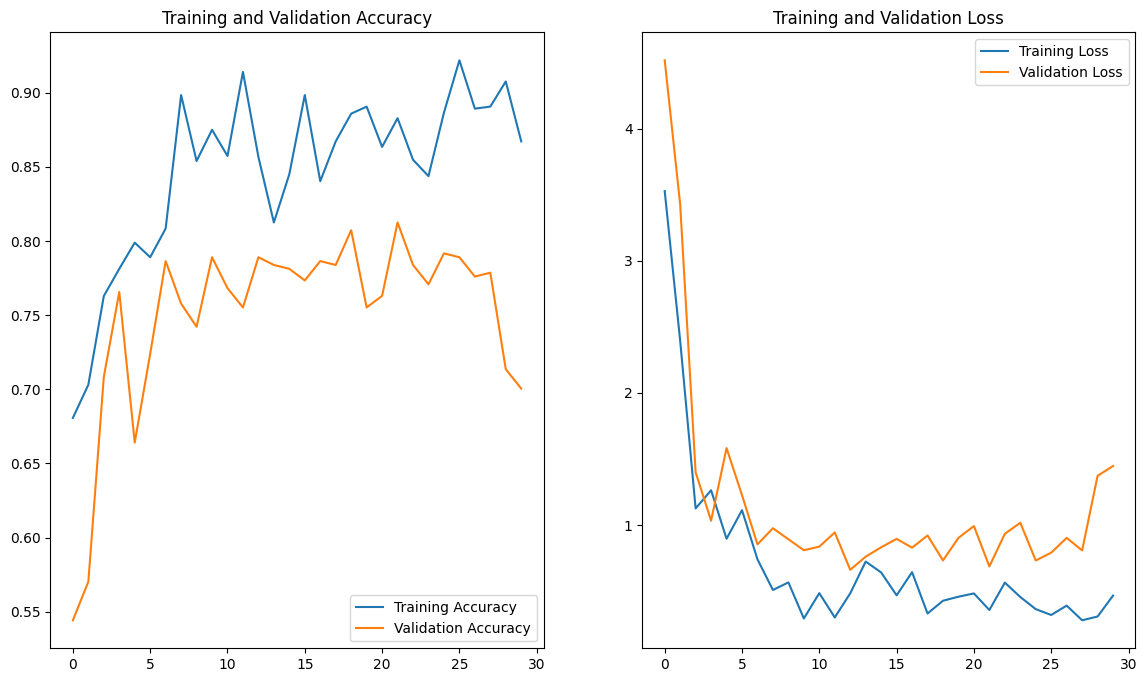

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 4. Hyperparameter Tuning

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(
    train_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks = [early_stop]
)